In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_sellers_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_reviews_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_geolocation_dataset.csv
/kaggle/input/brazilian-ecommerce/product_category_name_translation.csv
/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv
/kaggle/input/brazilian-ecommerce/olist_order_payments_dataset.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_orders = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv")[["order_id","customer_id","order_status","order_purchase_timestamp"]]

In [4]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39


In [5]:
df_orders.groupby(['order_status']).agg({'order_status': 'count'})

,order_status
order_status,
approved,2
canceled,625
created,5
delivered,96478
invoiced,314
processing,301
shipped,1107
unavailable,609


In [6]:
df_orders.count()

order_id                    99441
customer_id                 99441
order_status                99441
order_purchase_timestamp    99441
dtype: int64

In [7]:
df_orders = df_orders[df_orders["order_status"] == "delivered"]

In [8]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96478 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   order_id                  96478 non-null  object
 1   customer_id               96478 non-null  object
 2   order_status              96478 non-null  object
 3   order_purchase_timestamp  96478 non-null  object
dtypes: object(4)
memory usage: 3.7+ MB


In [9]:
df_order_items = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv")

In [10]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [11]:
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [12]:
df_order_items["monetary"] = df_order_items["price"] + df_order_items["freight_value"]

In [13]:
df_order_items = df_order_items[["order_id","order_item_id","product_id","monetary"]]

In [14]:
df_order_items.head()

,order_id,order_item_id,product_id,monetary
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,218.04


In [15]:
df_products = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv")[["product_id","product_category_name"]]

In [16]:
df_products.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas


In [17]:
df_products.count()

product_id               32951
product_category_name    32341
dtype: int64

In [18]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_id             32951 non-null  object
 1   product_category_name  32341 non-null  object
dtypes: object(2)
memory usage: 515.0+ KB


In [19]:
df_customers = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv")

In [20]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [21]:
df = (
    df_orders
    .join(
        df_order_items.set_index("order_id"),
        on="order_id",
        how="left"
    )
    .join(
        df_products.set_index("product_id"),
        on="product_id",
        how="left"
    )
    .join(
        df_customers.set_index("customer_id"),
        on="customer_id",
        how="left"
    )
)

In [22]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_item_id,product_id,monetary,product_category_name,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,1,87285b34884572647811a353c7ac498a,38.71,utilidades_domesticas,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,1,595fac2a385ac33a80bd5114aec74eb8,141.46,perfumaria,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,1,aa4383b373c6aca5d8797843e5594415,179.12,automotivo,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,1,d0b61bfb1de832b15ba9d266ca96e5b0,72.20,pet_shop,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,1,65266b2da20d04dbe00c5c2d3bb7859e,28.62,papelaria,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [23]:
import datetime

In [24]:
df["order_purchase"] = pd.to_datetime(df['order_purchase_timestamp'], format="ISO8601").apply(lambda x: x.date())

In [25]:
df = df[["order_id","customer_unique_id","order_purchase","product_id","product_category_name","monetary"]]

In [26]:
df["product_category_name"] = df["product_category_name"].fillna("without identification")

In [27]:
df_renamed = df.rename({
    "order_id": "id_pedido",
    "customer_unique_id": "id_cliente",
    "order_purchase": "data_compra",
    "product_id": "id_produto",
    "product_category_name": "categoria_produto",
    "monetary": "valor_monetario",
}, axis=1)

In [28]:
df_renamed.to_csv("customer_segmentation.csv", index=False)

In [29]:
df.count()

order_id                 110197
customer_unique_id       110197
order_purchase           110197
product_id               110197
product_category_name    110197
monetary                 110197
dtype: int64

Text(0, 0.5, 'Contagem')

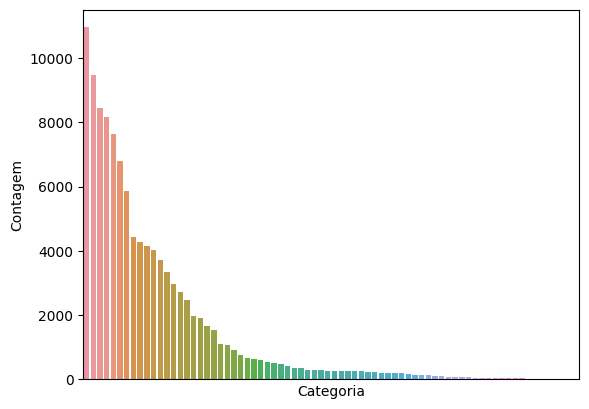

In [30]:
sns.countplot(
    x="product_category_name", 
    data=df, 
    order=df.product_category_name.value_counts().index
)

plt.xticks([])
plt.xlabel("Categoria")
plt.ylabel("Contagem")

In [31]:
df_amostra_menor_que_25k = df[(df["order_purchase"] >= pd.to_datetime("2018-1-1").date()) & (df["order_purchase"] <= pd.to_datetime("2018-3-31").date())]

In [32]:
df_amostra_maior_que_25k = df.copy()

## R - recency

In [33]:
def get_recency(df):
    max_date = df["order_purchase"].max()
    df_recency = df.groupby("customer_unique_id").agg({"order_purchase": "max"}).reset_index()
    df_recency["max_date"] = max_date
    df_recency["recency"] = df_recency["max_date"] - df_recency["order_purchase"]
    df_recency["recency"] = df_recency["recency"].apply(lambda x: x.days)
    df_recency = df_recency[["customer_unique_id","recency"]]

    return df_recency

In [34]:
df_recency_amostra_menor = get_recency(df_amostra_menor_que_25k)
df_recency_amostra_maior = get_recency(df_amostra_maior_que_25k)

## F - frequency

In [35]:
def get_frequency(df):
    df_frequency = df.groupby("customer_unique_id").agg({"order_id": "count"}).rename({"order_id": "frequency"}, axis=1).reset_index()
    return df_frequency

In [36]:
df_frequency_amostra_menor = get_frequency(df_amostra_menor_que_25k)
df_frequency_amostra_maior = get_frequency(df_amostra_maior_que_25k)

## M - monetary

In [37]:
def get_monetary(df):
    df_monetary = df.groupby("customer_unique_id").agg({"monetary": "sum"}).reset_index()
    return df_monetary

In [38]:
df_monetary_amostra_menor = get_monetary(df_amostra_menor_que_25k)
df_monetary_amostra_maior = get_monetary(df_amostra_maior_que_25k)

## RFM

In [39]:
def get_rfm(df):
    df_recency = get_recency(df)
    df_frequency = get_frequency(df)
    df_monetary = get_monetary(df)

    df_rfm = (
        df_recency
        .join(
            df_frequency.set_index("customer_unique_id"),
            on="customer_unique_id",
            how="inner"
        )
        .join(
            df_monetary.set_index("customer_unique_id"),
            on="customer_unique_id",
            how="inner"
        )
    )

    return df_rfm

In [40]:
df_rfm_amostra_menor = get_rfm(df_amostra_menor_que_25k)
df_rfm_amostra_maior = get_rfm(df_amostra_maior_que_25k)

In [41]:
## teste invertendo a recency

df_rfm_amostra_menor["recency"] = df_rfm_amostra_menor["recency"].apply(lambda x: 1 if x == 0 else 1/x)
df_rfm_amostra_maior["recency"] = df_rfm_amostra_maior["recency"].apply(lambda x: 1 if x == 0 else 1/x)

In [42]:
df_rfm_amostra_menor.head()

,customer_unique_id,recency,frequency,monetary
0,00053a61a98854899e70ed204dd4bafe,0.032258,2,419.18
1,0005ef4cd20d2893f0d9fbd94d3c0d97,0.052632,1,129.76
2,00090324bbad0e9342388303bb71ba0a,0.142857,1,63.66
3,000d460961d6dbfa3ec6c9f5805769e1,0.012048,1,36.68
4,0010fb34b966d44409382af9e8fd5b77,0.038462,1,61.80


In [43]:
df_rfm_amostra_menor.describe()

,recency,frequency,monetary
count,20211.000000,20211.000000,20211.000000
mean,0.060770,1.166296,156.580778
std,0.137502,0.598451,188.680241
min,0.011236,1.000000,13.360000
25%,0.014925,1.000000,61.135000
50%,0.022727,1.000000,106.380000
75%,0.043478,1.000000,177.490000
max,1.000000,20.000000,4175.260000


In [44]:
df_rfm_amostra_maior.head()

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,0.009009,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.008772,1,27.19
2,0000f46a3911fa3c0805444483337064,0.001862,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,0.003115,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,0.003472,1,196.89


In [45]:
df_rfm_amostra_maior.describe()

,recency,frequency,monetary
count,93358.000000,93358.000000,93358.000000
mean,0.011820,1.180370,165.168210
std,0.034152,0.620857,226.292101
min,0.001403,1.000000,9.590000
25%,0.002890,1.000000,63.010000
50%,0.004587,1.000000,107.780000
75%,0.008772,1.000000,182.510000
max,1.000000,24.000000,13664.080000


In [46]:
all_columns = df_rfm_amostra_maior.columns[1:]

In [47]:
df_rfm_amostra_maior[all_columns].corr()

,recency,frequency,monetary
recency,1.000000,0.002458,-0.008965
frequency,0.002458,1.000000,0.229764
monetary,-0.008965,0.229764,1.000000


In [48]:
df_rfm_amostra_menor[all_columns].corr()

,recency,frequency,monetary
recency,1.000000,0.007556,0.015555
frequency,0.007556,1.000000,0.247895
monetary,0.015555,0.247895,1.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


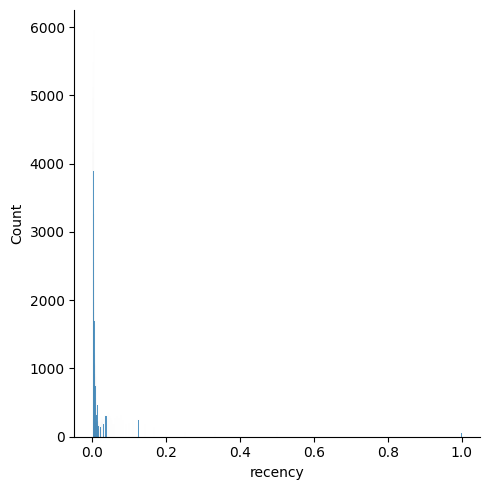

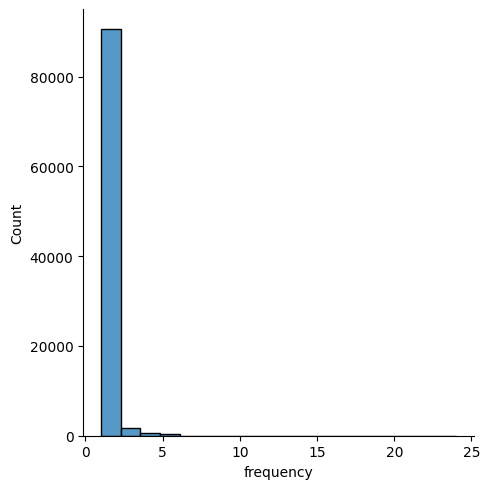

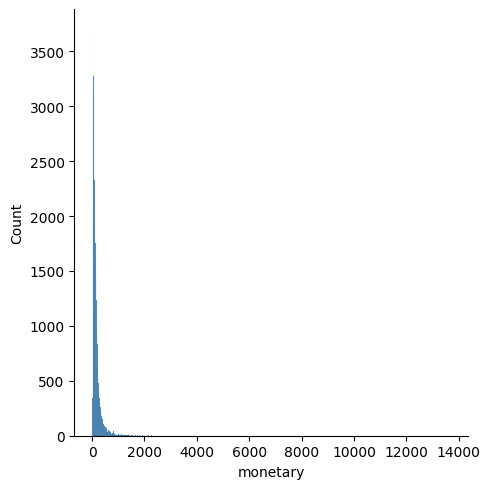

In [49]:
for col in all_columns:

    sns.displot(df_rfm_amostra_maior[col])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


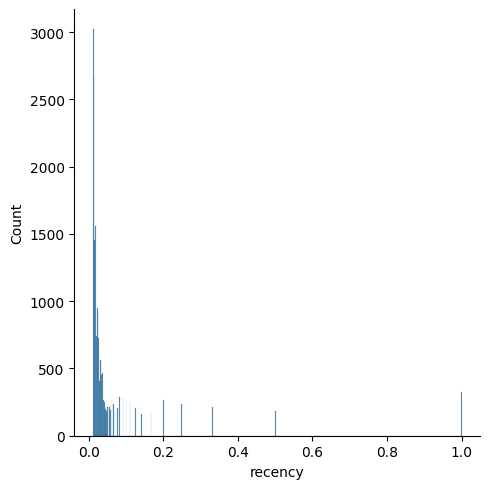

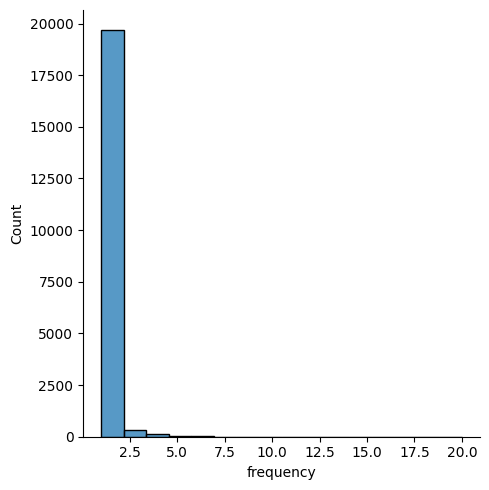

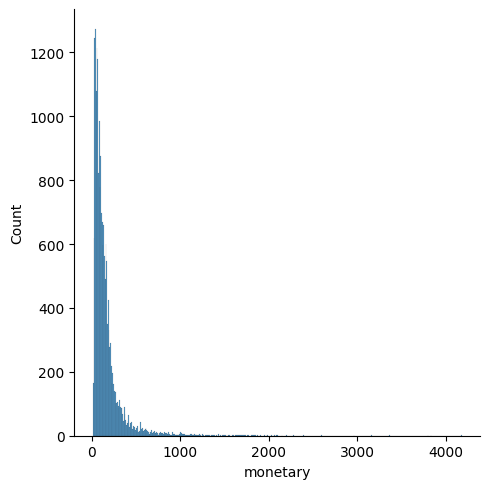

In [50]:
for col in all_columns:

    sns.displot(df_rfm_amostra_menor[col])

In [51]:
def get_rfm_std(df_rfm):
    df_rfm_std = df_rfm.copy()

    cols_to_std = df_rfm.columns[1:]

    for col in cols_to_std:
        x_mean = df_rfm[col].mean()
        x_std = df_rfm[col].std()
        
        df_rfm_std[col] = df_rfm[col].apply(lambda x: (x - x_mean)/(x_std))
    
    return df_rfm_std

In [52]:
df_rfm_amostra_menor_std = get_rfm_std(df_rfm_amostra_menor)
df_rfm_amostra_maior_std = get_rfm_std(df_rfm_amostra_maior)

In [53]:
df_rfm_amostra_maior_std.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,recency,frequency,monetary
count,93358,93358,93358
mean,1.00464e-17,5.57121e-17,-4.58179e-17
std,1,1,1
min,-0.305035,-0.290518,-0.687511
25%,-0.261475,-0.290518,-0.451444
50%,-0.211786,-0.290518,-0.253602
75%,-0.089251,-0.290518,0.0766345
max,28.935,36.755,59.6526


In [54]:
df_rfm_amostra_menor_std.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,recency,frequency,monetary
count,20211,20211,20211
mean,4.5e-17,-5.13281e-17,-5.30859e-17
std,1,1,1
min,-0.360242,-0.277877,-0.759066
25%,-0.33341,-0.277877,-0.50586
50%,-0.27667,-0.277877,-0.266063
75%,-0.125755,-0.277877,0.110818
max,6.83069,31.4708,21.2989


In [55]:
df_rfm_amostra_maior[all_columns].corr()

,recency,frequency,monetary
recency,1.000000,0.002458,-0.008965
frequency,0.002458,1.000000,0.229764
monetary,-0.008965,0.229764,1.000000


In [56]:
df_rfm_amostra_maior_std[all_columns].corr()

,recency,frequency,monetary
recency,1.000000,0.002458,-0.008965
frequency,0.002458,1.000000,0.229764
monetary,-0.008965,0.229764,1.000000


<Axes: title={'center': 'Amostra sem filtro de data'}>

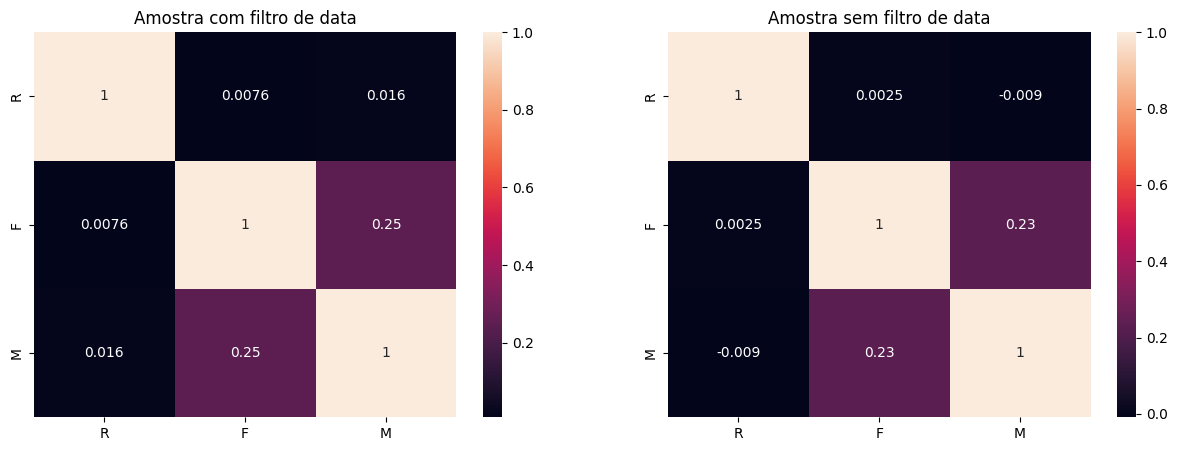

In [57]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title("Amostra com filtro de data")
sns.heatmap(df_rfm_amostra_menor[all_columns].rename({"recency": "R", "frequency": "F", "monetary": "M"}, axis=1).corr().round(4), annot=True)

plt.subplot(1, 2, 2)
plt.title("Amostra sem filtro de data")
sns.heatmap(df_rfm_amostra_maior[all_columns].rename({"recency": "R", "frequency": "F", "monetary": "M"}, axis=1).corr().round(4), annot=True)


/tmp/ipykernel_18/2540155758.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3, 2, 1); sns.distplot(df_to_plot1['R'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_18/2540155758.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function f

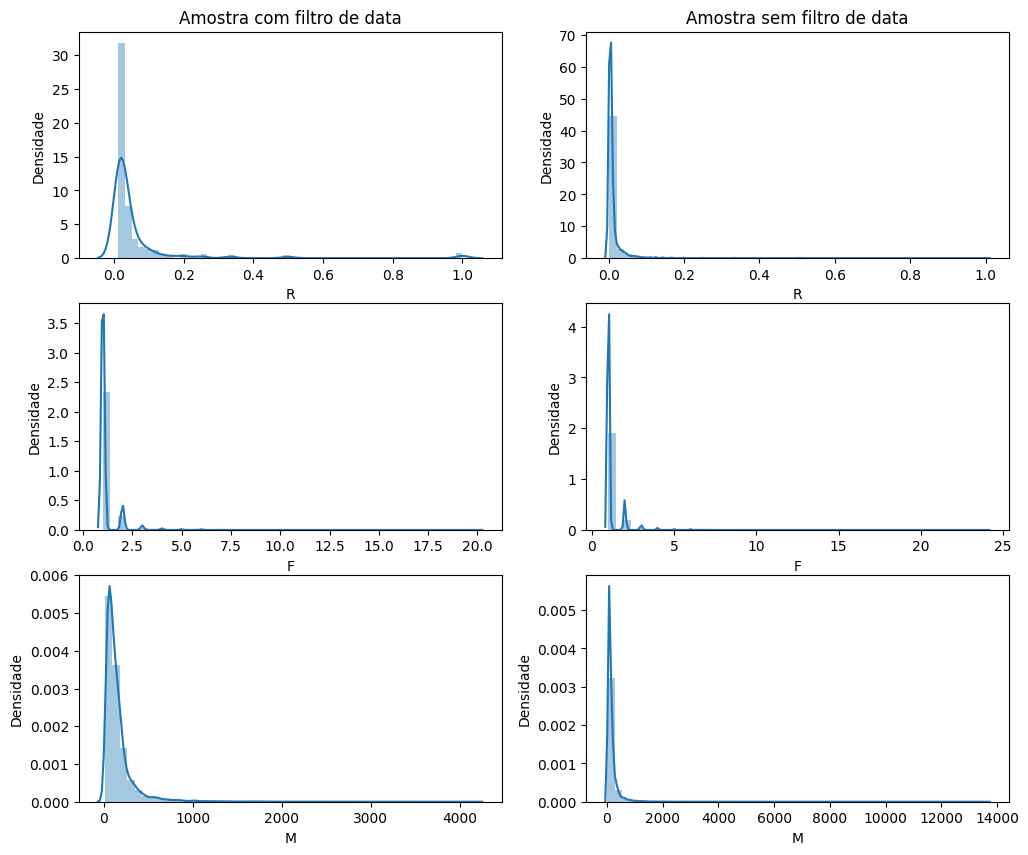

In [58]:
df_to_plot1 = df_rfm_amostra_menor[all_columns].rename({"recency": "R", "frequency": "F", "monetary": "M"}, axis=1)
df_to_plot2 = df_rfm_amostra_maior[all_columns].rename({"recency": "R", "frequency": "F", "monetary": "M"}, axis=1)

plt.figure(figsize=(12, 10))
ax1 = plt.subplot(3,2,1)
ax1.set_title("Amostra com filtro de data")
plt.subplot(3, 2, 1); sns.distplot(df_to_plot1['R'])
plt.ylabel("Densidade")
plt.subplot(3, 2, 3); sns.distplot(df_to_plot1['F'])
plt.ylabel("Densidade")
plt.subplot(3, 2, 5); sns.distplot(df_to_plot1['M'])
plt.ylabel("Densidade")

ax2 = plt.subplot(3,2,2)
ax2.set_title("Amostra sem filtro de data")
plt.subplot(3, 2, 2); sns.distplot(df_to_plot2['R'])
plt.ylabel("Densidade")
plt.subplot(3, 2, 4); sns.distplot(df_to_plot2['F'])
plt.ylabel("Densidade")
plt.subplot(3, 2, 6); sns.distplot(df_to_plot2['M'])
plt.ylabel("Densidade")

plt.show()

# Funcionamento da página web:

A página funcionará de duas formas diferentes, dependendo da quantidade de clientes inserida. 

1. Quantidade de clientes > 25.000:
- Por conta da limitação de recursos, caso a quantidade de clientes seja superior a 25k, a página irá rodar somente kmeans com o método do cotovelo para determinação do melhor número de clusters
2. Quantidade de clientes <= 25.000:
- A página irá comparar 3 modelos avaliados por 3 tipos de score para obter o melhor modelo e quantidade de clusters para os dados inseridos

## Clientes <= 25k

In [59]:
from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, BisectingKMeans
from math import sqrt

min_number_of_clusters = 2
max_number_of_clusters = 10

In [60]:
%%time

silhouette_score = []
ch_score = []
db_score = []

for i in range(min_number_of_clusters, max_number_of_clusters + 1):
    
    print(i)

    agg = AgglomerativeClustering(
        n_clusters=i,
        affinity='deprecated',
        compute_distances=False,
        compute_full_tree='auto',
        connectivity=None,
        distance_threshold=None,
        linkage='ward',
        memory=None,
        metric=None,
    )
    agg.fit(df_rfm_amostra_menor_std[all_columns])
    
    silhouette_score.append(metrics.silhouette_score(df_rfm_amostra_menor_std[all_columns], agg.labels_, metric='euclidean'))
    ch_score.append(metrics.calinski_harabasz_score(df_rfm_amostra_menor_std[all_columns], agg.labels_))
    db_score.append(metrics.davies_bouldin_score(df_rfm_amostra_menor_std[all_columns], agg.labels_))
    
df_agg_clustering = pd.DataFrame()
df_agg_clustering['n'] = range(min_number_of_clusters, max_number_of_clusters + 1)
df_agg_clustering['silhouette_score'] = silhouette_score
df_agg_clustering['ch_score'] = ch_score
df_agg_clustering['db_score'] = db_score
    

2
3
4
5
6
7
8
9
10
CPU times: user 3min 12s, sys: 40.2 s, total: 3min 52s
Wall time: 3min 14s


In [61]:
%%time

silhouette_score2 = []
ch_score2 = []
db_score2 = []

for i in range(min_number_of_clusters, max_number_of_clusters + 1):
    
    print(i)

    bsc = BisectingKMeans(
        n_clusters=i, 
        algorithm='lloyd',
        bisecting_strategy='biggest_inertia',
        copy_x=True,
        init='k-means++',
        max_iter=300,
        n_init=1,
        random_state=42,
        tol=0.0001,
        verbose=0
    )
    bsc.fit(df_rfm_amostra_menor_std[all_columns])
    
    silhouette_score2.append(metrics.silhouette_score(df_rfm_amostra_menor_std[all_columns], bsc.labels_, metric='euclidean'))
    ch_score2.append(metrics.calinski_harabasz_score(df_rfm_amostra_menor_std[all_columns], bsc.labels_))
    db_score2.append(metrics.davies_bouldin_score(df_rfm_amostra_menor_std[all_columns], bsc.labels_))
    
df_bikmeans = pd.DataFrame()
df_bikmeans['n'] = range(min_number_of_clusters, max_number_of_clusters + 1)
df_bikmeans['silhouette_score'] = silhouette_score2
df_bikmeans['ch_score'] = ch_score2
df_bikmeans['db_score'] = db_score2

2
3
4
5
6
7
8
9
10
CPU times: user 1min 1s, sys: 28.5 s, total: 1min 29s
Wall time: 45.7 s


In [62]:
%%time

silhouette_score3 = []
ch_score3 = []
db_score3 = []

for i in range(min_number_of_clusters, max_number_of_clusters + 1):
    
    print(i)

    kmeans = KMeans(
        n_clusters=i, 
        algorithm='lloyd',
        copy_x=True,
        init='k-means++',
        max_iter=300,
        n_init='warn',
        random_state=42,
        tol=0.0001,
        verbose=0
    )
    kmeans.fit(df_rfm_amostra_menor_std[all_columns])
    
    silhouette_score3.append(metrics.silhouette_score(df_rfm_amostra_menor_std[all_columns], kmeans.labels_, metric='euclidean'))
    ch_score3.append(metrics.calinski_harabasz_score(df_rfm_amostra_menor_std[all_columns], kmeans.labels_))
    db_score3.append(metrics.davies_bouldin_score(df_rfm_amostra_menor_std[all_columns], kmeans.labels_))
    
    
df_kmeans = pd.DataFrame()
df_kmeans['n'] = range(min_number_of_clusters, max_number_of_clusters + 1)
df_kmeans['silhouette_score'] = silhouette_score3
df_kmeans['ch_score'] = ch_score3
df_kmeans['db_score'] = db_score3 
    

2


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


5


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


6


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


7


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


8


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


9


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


10


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


CPU times: user 1min 27s, sys: 35.8 s, total: 2min 3s
Wall time: 54.3 s


### ranking para obter o melhor n_clusters automaticamente

- silhouette_score: entre -1 e +1, melhores valores perto de +1
- calinski_harabasz_score: maiores valores = clusters melhores
- davies_bouldin_score: menores valores = clusters melhores

In [63]:
def get_ranking(df):
    ranking = pd.DataFrame()
    metrics = ["silhouette_score", "ch_score", "db_score"]
    
    ranking_1 = df["silhouette_score"].sort_values(ascending=False).reset_index()
    ranking_1["posicao1"] = ranking_1.index + 1
    del ranking_1["index"]
    
    ranking_2 = df["ch_score"].sort_values(ascending=False).reset_index()
    ranking_2["posicao2"] = ranking_2.index + 1
    del ranking_2["index"]
    
    ranking_3 = df["db_score"].sort_values(ascending=True).reset_index()
    ranking_3["posicao3"] = ranking_3.index + 1
    del ranking_3["index"]
        
    ranking_final = (
        df
        .join(
            ranking_1.set_index("silhouette_score"),
            "silhouette_score",
            "left"
        )
        .join(
            ranking_2.set_index("ch_score"),
            "ch_score",
            "left"
        )
        .join(
            ranking_3.set_index("db_score"),
            "db_score",
            "left"
        )
    )
    
    ranking_final["posicao_final"] = ranking_final["posicao1"] + ranking_final["posicao2"] + ranking_final["posicao3"]
    
    return ranking_final
    

In [64]:
def get_best_n(df_ranking): 
    return df_ranking[df_ranking["posicao_final"] == df_ranking["posicao_final"].min()]["n"].values[0]

In [65]:
def get_best_alg(df_ranking): 
    return df_ranking[df_ranking["posicao_final"] == df_ranking["posicao_final"].min()]["alg"].values[0]

In [66]:
def get_scores_from_n(df_ranking): 
    return df_ranking[df_ranking["posicao_final"] == df_ranking["posicao_final"].min()]

In [67]:
ranking_kmeans = get_ranking(df_kmeans)
ranking_agg = get_ranking(df_agg_clustering)
ranking_bi = get_ranking(df_bikmeans)

In [68]:
ranking_kmeans

,n,silhouette_score,ch_score,db_score,posicao1,posicao2,posicao3,posicao_final
0,2,0.783823,7160.857477,0.529455,1,9,1,11
1,3,0.729664,9766.848281,0.951813,2,8,9,19
2,4,0.686459,11265.834567,0.724217,3,7,8,18
3,5,0.656445,12275.450459,0.614331,7,6,6,19
4,6,0.671600,12708.684412,0.608032,4,5,4,13
5,7,0.662526,14029.357579,0.606908,5,4,3,12
6,8,0.660409,14807.379196,0.590689,6,3,2,11
7,9,0.525046,15924.446716,0.609799,9,2,5,16
8,10,0.531479,16119.137464,0.656773,8,1,7,16


In [69]:
scores_kmeans = get_scores_from_n(ranking_kmeans)
scores_kmeans["alg"] = "kmeans"

/tmp/ipykernel_18/3956117733.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores_kmeans["alg"] = "kmeans"


In [70]:
scores_agg = get_scores_from_n(ranking_agg)
scores_agg["alg"] = "agg"

/tmp/ipykernel_18/2842395046.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores_agg["alg"] = "agg"


In [71]:
ranking_agg

,n,silhouette_score,ch_score,db_score,posicao1,posicao2,posicao3,posicao_final
0,2,0.816313,6860.369044,0.271923,1,9,1,11
1,3,0.656005,8997.662920,0.873621,3,8,9,20
2,4,0.673594,10496.649673,0.692589,2,7,7,16
3,5,0.615136,10522.848888,0.669284,6,6,6,18
4,6,0.644935,10931.691861,0.701830,5,5,8,18
5,7,0.648216,11421.303106,0.640799,4,4,3,11
6,8,0.490033,11997.378339,0.659105,9,3,5,17
7,9,0.493500,13193.587183,0.646127,8,2,4,14
8,10,0.498474,13601.857410,0.638244,7,1,2,10


In [72]:
scores_bi = get_scores_from_n(ranking_bi)
scores_bi["alg"] = "bisect_kmeans"

/tmp/ipykernel_18/891662350.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores_bi["alg"] = "bisect_kmeans"


In [73]:
ranking_bi

,n,silhouette_score,ch_score,db_score,posicao1,posicao2,posicao3,posicao_final
0,2,0.817643,6862.146899,0.290290,1,8,1,10
1,3,0.526804,4530.477289,0.910257,9,9,3,21
2,4,0.606574,7429.913775,0.961636,3,7,4,14
3,5,0.621151,8776.077613,0.818077,2,5,2,9
4,6,0.584798,8710.102322,0.989744,8,6,6,20
5,7,0.589622,8995.899312,0.998411,6,3,7,16
6,8,0.593907,9461.738621,0.968864,4,2,5,11
7,9,0.585885,8778.420559,1.109162,7,4,9,20
8,10,0.590787,10030.010362,1.014678,5,1,8,14


In [74]:
posicoes_final = pd.concat([scores_kmeans, scores_agg, scores_bi])[['n', 'silhouette_score', 'ch_score', 'db_score', 'alg']]

In [75]:
posicoes_final

,n,silhouette_score,ch_score,db_score,alg
0,2,0.783823,7160.857477,0.529455,kmeans
6,8,0.660409,14807.379196,0.590689,kmeans
8,10,0.498474,13601.857410,0.638244,agg
3,5,0.621151,8776.077613,0.818077,bisect_kmeans


In [76]:
ranking_final = get_ranking(posicoes_final)
ranking_final

,n,silhouette_score,ch_score,db_score,alg,posicao1,posicao2,posicao3,posicao_final
0,2,0.783823,7160.857477,0.529455,kmeans,1,4,1,6
6,8,0.660409,14807.379196,0.590689,kmeans,2,1,2,5
8,10,0.498474,13601.857410,0.638244,agg,4,2,3,9
3,5,0.621151,8776.077613,0.818077,bisect_kmeans,3,3,4,10


In [77]:
scores_final = get_scores_from_n(ranking_final)
scores_final

,n,silhouette_score,ch_score,db_score,alg,posicao1,posicao2,posicao3,posicao_final
6,8,0.660409,14807.379196,0.590689,kmeans,2,1,2,5


In [78]:
n = get_best_n(ranking_final)

In [79]:
alg = get_best_alg(ranking_final)

In [80]:
print(n, alg)

8 kmeans


In [81]:
if(alg == "kmeans"): 
    model = KMeans(
        n_clusters=n, 
        algorithm='lloyd',
        copy_x=True,
        init='k-means++',
        max_iter=300,
        n_init='warn',
        random_state=42,
        tol=0.0001,
        verbose=0
    )
elif(alg == "agg"): 
    model = AgglomerativeClustering(
        n_clusters=n,
        affinity='deprecated',
        compute_distances=False,
        compute_full_tree='auto',
        connectivity=None,
        distance_threshold=None,
        linkage='ward',
        memory=None,
        metric=None,
    )
else: 
    model = BisectingKMeans(
        n_clusters=n, 
        algorithm='lloyd',
        bisecting_strategy='biggest_inertia',
        copy_x=True,
        init='k-means++',
        max_iter=300,
        n_init=1,
        random_state=42,
        tol=0.0001,
        verbose=0
    )

In [82]:
clusters = model.fit_predict(df_rfm_amostra_menor_std[all_columns])

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [83]:
df_rfm_amostra_menor["cluster"] = clusters
df_rfm_amostra_menor_std["cluster"] = clusters

In [84]:
df_rfm_amostra_menor_plot = df_rfm_amostra_menor.copy()
df_rfm_amostra_menor_plot["recency"] = df_rfm_amostra_menor_plot["recency"].apply(lambda x: 0 if x == 1 else 1/x)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

CPU times: user 10.4 s, sys: 1.77 s, total: 12.2 s
Wall time: 9.28 s


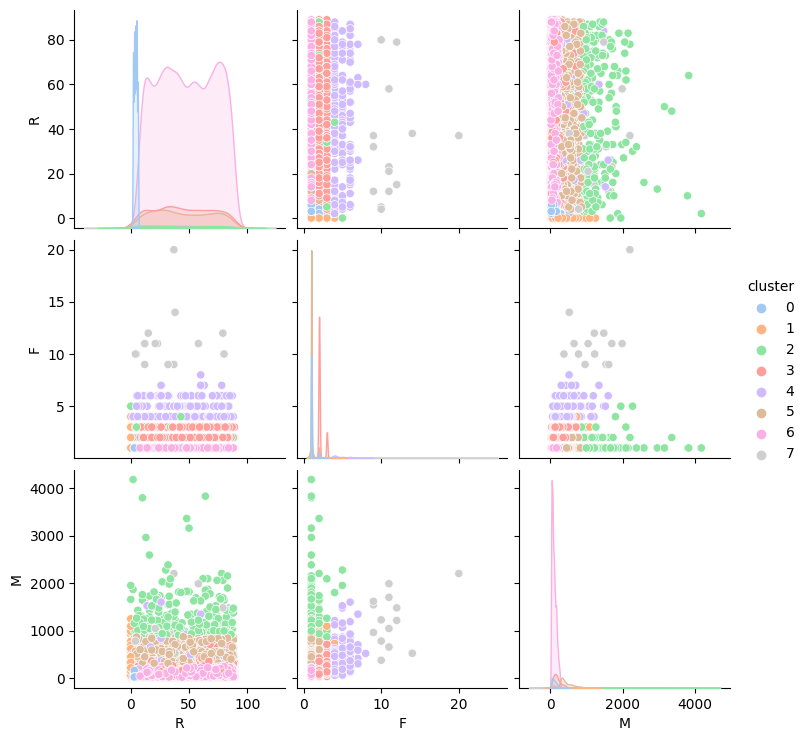

In [85]:
%%time
sns.pairplot(df_rfm_amostra_menor_plot[list(all_columns) + ["cluster"]].rename({"recency": "R", "frequency": "F", "monetary": "M"}, axis=1), hue="cluster", palette="pastel")

In [86]:
import plotly.express as px

def plot_segmentation(df_rfmv, x, y, z, border=True, marker_size=5):
    fig = px.scatter_3d(
        df_rfmv, 
        x=x, 
        y=y, 
        z=z,
        color='cluster'
    )
    
    if border:
        fig.update_traces( 
            marker = dict(line=dict(width=0.01, color='black')),
            marker_size=marker_size
        )

    return fig

In [87]:
df_rfm_amostra_menor_plot = df_rfm_amostra_menor_plot.rename({"recency": "R", "frequency": "F", "monetary": "M"}, axis=1)

In [88]:
plot_segmentation(df_rfm_amostra_menor_plot, "M", "R", "F",border=False, marker_size=2)

In [89]:
df_rfm_amostra_menor[list(all_columns) + ["cluster"]].groupby("cluster").describe().T

cluster                   0            1            2            3  \
recency   count  944.000000   322.000000   218.000000  1926.000000   
          mean     0.290907     1.000000     0.066984     0.038453   
          std      0.115659     0.000000     0.124144     0.042450   
          min      0.166667     1.000000     0.011364     0.011236   
          25%      0.200000     1.000000     0.014925     0.015152   
          50%      0.250000     1.000000     0.026671     0.022727   
          75%      0.333333     1.000000     0.062500     0.039615   
          max      0.500000     1.000000     1.000000     0.333333   
frequency count  944.000000   322.000000   218.000000  1926.000000   
          mean     1.052966     1.177019     1.211009     2.153686   
          std      0.237858     0.520334     0.615819     0.360742   
          min      1.000000     1.000000     1.000000     2.000000   
          25%      1.000000     1.000000     1.000000     2.000000   
          50%      1.000000     1.000000     1.000000     2.000000   
          75%      1.000000     1.000000     1.000000     2.000000   
          max      3.000000     5.000000     5.000000     3.000000   
monetary  count  944.000000   322.000000   218.000000  1926.000000   
          mean   118.269852   160.505404  1330.366009   192.841968   
          std     78.433767   173.059636   514.018895   112.776672   
          min     19.640000    14.390000   873.100000    29.520000   
          25%     58.715000    58.792500  1011.327500   111.745000   
          50%    101.435000   110.030000  1155.375000   167.995000   
          75%    158.985000   174.575000  1477.607500   247.040000   
          max    521.370000  1251.440000  4175.260000   856.860000   

cluster                    4            5             6            7  
recency   count   204.000000  1554.000000  15029.000000    14.000000  
          mean      0.047555     0.037744      0.031516     0.066318  
          std       0.072557     0.039886      0.026218     0.071877  
          min       0.011364     0.011236      0.011236     0.012500  
          25%       0.015625     0.014925      0.014493     0.026494  
          50%       0.022475     0.023256      0.021277     0.037364  
          75%       0.040000     0.041667      0.037037     0.079167  
          max       0.500000     0.333333      0.142857     0.250000  
frequency count   204.000000  1554.000000  15029.000000    14.000000  
          mean      4.759804     1.047619      1.000000    11.357143  
          std       0.923770     0.213027      0.000000     2.844891  
          min       4.000000     1.000000      1.000000     9.000000  
          25%       4.000000     1.000000      1.000000    10.000000  
          50%       4.000000     1.000000      1.000000    11.000000  
          75%       5.250000     1.000000      1.000000    11.750000  
          max       8.000000     2.000000      1.000000    20.000000  
monetary  count   204.000000  1554.000000  15029.000000    14.000000  
          mean    402.868775   451.070431    102.427462  1240.014286  
          std     273.262400   155.711514     59.728576   547.337875  
          min      67.080000   276.070000     13.360000   382.000000  
          25%     210.460000   324.600000     54.050000   830.197500  
          50%     319.845000   399.050000     87.800000  1224.660000  
          75%     489.392500   554.400000    141.630000  1600.987500  
          max    1603.080000   884.980000    277.160000  2202.400000

In [90]:
df_rfm_amostra_menor_plot[["R","F","M"] + ["cluster"]].groupby("cluster").describe().T

cluster           0            1            2            3            4  \
R count  944.000000   322.000000   218.000000  1926.000000   204.000000   
  mean     3.947034     0.000000    41.683486    45.193666    44.127451   
  std      1.351858     0.000000    27.610954    24.300209    24.562044   
  min      2.000000     0.000000     0.000000     3.000000     2.000000   
  25%      3.000000     0.000000    16.000000    25.250000    25.000000   
  50%      4.000000     0.000000    37.500000    44.000000    44.500000   
  75%      5.000000     0.000000    67.000000    66.000000    64.000000   
  max      6.000000     0.000000    88.000000    89.000000    88.000000   
F count  944.000000   322.000000   218.000000  1926.000000   204.000000   
  mean     1.052966     1.177019     1.211009     2.153686     4.759804   
  std      0.237858     0.520334     0.615819     0.360742     0.923770   
  min      1.000000     1.000000     1.000000     2.000000     4.000000   
  25%      1.000000     1.000000     1.000000     2.000000     4.000000   
  50%      1.000000     1.000000     1.000000     2.000000     4.000000   
  75%      1.000000     1.000000     1.000000     2.000000     5.250000   
  max      3.000000     5.000000     5.000000     3.000000     8.000000   
M count  944.000000   322.000000   218.000000  1926.000000   204.000000   
  mean   118.269852   160.505404  1330.366009   192.841968   402.868775   
  std     78.433767   173.059636   514.018895   112.776672   273.262400   
  min     19.640000    14.390000   873.100000    29.520000    67.080000   
  25%     58.715000    58.792500  1011.327500   111.745000   210.460000   
  50%    101.435000   110.030000  1155.375000   167.995000   319.845000   
  75%    158.985000   174.575000  1477.607500   247.040000   489.392500   
  max    521.370000  1251.440000  4175.260000   856.860000  1603.080000   

cluster            5             6            7  
R count  1554.000000  15029.000000    14.000000  
  mean     44.775418     47.807838    32.357143  
  std      24.404203     23.836557    24.926375  
  min       3.000000      7.000000     4.000000  
  25%      24.000000     27.000000    12.750000  
  50%      43.000000     47.000000    27.500000  
  75%      67.000000     69.000000    37.750000  
  max      89.000000     89.000000    80.000000  
F count  1554.000000  15029.000000    14.000000  
  mean      1.047619      1.000000    11.357143  
  std       0.213027      0.000000     2.844891  
  min       1.000000      1.000000     9.000000  
  25%       1.000000      1.000000    10.000000  
  50%       1.000000      1.000000    11.000000  
  75%       1.000000      1.000000    11.750000  
  max       2.000000      1.000000    20.000000  
M count  1554.000000  15029.000000    14.000000  
  mean    451.070431    102.427462  1240.014286  
  std     155.711514     59.728576   547.337875  
  min     276.070000     13.360000   382.000000  
  25%     324.600000     54.050000   830.197500  
  50%     399.050000     87.800000  1224.660000  
  75%     554.400000    141.630000  1600.987500  
  max     884.980000    277.160000  2202.400000

- para recência, quanto menor maior o score
- para frequência, quanto maior maior o score
- para valor monetário, quanto maior maior o score

In [91]:
def get_score_from_qcut(df):
    impossible_to_score = []
    all_columns = ['recency', 'frequency', 'monetary']

    for col in all_columns:
        try:
            df[f"{col}_score"] = pd.qcut(df[col], 5, labels=[1,2,3,4,5])
        except:
            impossible_to_score.append(col)
            
    return impossible_to_score

    

In [92]:
def get_score(score_len, val, col):
    
    """
    if(col == "recency"):
        return 6 - (int(val/score_len)+1)
    else:
        return (int(val/score_len)+1)
    """
    
    return (int(val/score_len)+1)
    

In [93]:
1==1

True

In [94]:
def get_score_to_impossible(df, impossible_to_score):
    for col in impossible_to_score:
        min_value = df[col].min()
        max_value = df[col].max()

        range_len = max_value - min_value + 1
        score_len = int(range_len/5)+1


        df[f"{col}_score"] = df[col].apply(lambda x: get_score(score_len, x, col))

In [95]:
def get_ordered_columns(df):
    return df[['customer_unique_id', 'recency', 'frequency', 'monetary', 'cluster',
       'recency_score', 'frequency_score', 'monetary_score']]

In [96]:
def fill_na_scores(df):
    df["recency_score"] = df["recency_score"].fillna(1)
    df["frequency_score"] = df["frequency_score"].fillna(1)
    df["monetary_score"] = df["monetary_score"].fillna(1)

In [97]:
seg_map= {
    r'332|322|233|232|223|222|132|123|122|212|211|111|112|121|131|141|151': 'Perdidos', 
    r'255|254|245|244|253|252|243|242|235|234|225|224|153|152|145|143|142|135|134|133|125|124|155|154|144|214|215|115|114|113': 'Em Risco',
    r'331|321|312|221|213|231|241|251|535|534|443|434|343|334|325|324': 'Atenção',
    r'525|524|523|522|521|515|514|513|425|424|413|414|415|315|314|313|553|551|552|541|542|533|532|531|452|451|442|441|431|453|433|432|423|353|352|351|342|341|333|323': 'Promissores',
    r'512|511|422|421|412|411|311': 'Novos clientes',
    r'555|554|544|545|454|455|445|543|444|435|355|354|345|344|335': 'Melhores clientes'
}

In [98]:
def get_rfm_score(df):
    df["RFM_SCORE"] = (
        df["recency_score"].astype(str) 
        + df["frequency_score"].astype(str) 
        + df["monetary_score"].astype(str)
    )

In [99]:
def get_segment(df):
    df['segment'] = df['RFM_SCORE'].replace(seg_map, regex=True)

In [100]:
df_rfm_to_score = df_rfm_amostra_menor[['customer_unique_id', 'recency', 'frequency', 'monetary','cluster']]
impossible_to_score = get_score_from_qcut(df_rfm_to_score)
get_score_to_impossible(df_rfm_to_score, impossible_to_score)
get_ordered_columns(df_rfm_to_score)
fill_na_scores(df_rfm_to_score)
get_rfm_score(df_rfm_to_score)
get_segment(df_rfm_to_score)

In [101]:
qtd_por_cluster = pd.DataFrame(df_rfm_to_score.groupby(["cluster","segment"])["RFM_SCORE"].count()).rename({"RFM_SCORE": "qtd"}, axis=1)

In [102]:
qtd_total = pd.DataFrame(df_rfm_to_score.groupby(["cluster"])["cluster"].count()).rename({"cluster": "contagem_total"}, axis=1)

In [103]:
percentual_final = qtd_por_cluster.join(qtd_total, on="cluster", how="left")
percentual_final["perc"] = 100*percentual_final["qtd"]/percentual_final["contagem_total"]
percentual_final = percentual_final[["perc"]]

In [104]:
def plot_customers_by_cluster(df, x, y, color):
    df_to_plot = df.sort_values(by=[y], ascending=[False]).reset_index()
    
    fig = px.bar(df_to_plot, x=x, y=y, color=color)
    fig.update_layout(
        xaxis_title=dict(text='Segmentação', font=dict(size=16, color='#FFFFFF')),
        yaxis_title=dict(text='Valor monetário', font=dict(size=16, color='#FFFFFF')),
        legend_title="Categorias"
    )
    return fig

In [105]:
import plotly.express as px
#plot_customers_by_cluster(qtd_por_cluster, x="cluster", y="qtd", color="segment")

In [106]:
percentual_final.columns

Index(['perc'], dtype='object')

In [107]:
#plot_customers_by_cluster(percentual_final, x="cluster", y="perc", color="segment")

## Clientes > 25k

Para essa quantidade de clientes, será aplicado apenas o k-means com método de cotovelo.

In [108]:
import time

In [109]:

min_number_of_clusters = 2
max_number_of_clusters = 10

def get_inertias(df_rfmv):
    inertias = []
    fit_time = []

    for i in range(min_number_of_clusters, max_number_of_clusters + 1):
        
        start_time = time.time()
        
        kmeans = KMeans(
            n_clusters=i, 
            algorithm='lloyd',
            copy_x=True,
            init='k-means++',
            max_iter=300,
            n_init='warn',
            random_state=42,
            tol=0.0001,
            verbose=0
        )
        kmeans.fit(df_rfmv[all_columns])
        
        end_time = time.time()
        
        inertias.append(kmeans.inertia_)
        fit_time.append(end_time - start_time)

    return inertias, fit_time

def plot_elbow_method(inertias, fit_time):
    best_cluster, _ = get_optimal_number_of_clusters(inertias)
    
    fig, ax1 = plt.subplots()
    
    ax1.set_title('Método do Cotovelo')
    
    ax2 = ax1.twinx()
    ax1.plot(range(min_number_of_clusters, max_number_of_clusters + 1), inertias, marker='o', color="skyblue")
    ax2.plot(range(min_number_of_clusters, max_number_of_clusters + 1), fit_time, marker='s', color="lightgreen", ls="--")

    ax1.set_xlabel('Número de segmentações')
    ax1.set_ylabel('Inércia')
    ax2.set_ylabel('Tempo (s)')
    
    plt.axvline(best_cluster, color="gray", linestyle="--", label=f"Cotovelo em n={best_cluster}")

    plt.show()


def get_optimal_number_of_clusters(inertias):
    x1, y1 = min_number_of_clusters, inertias[0]
    x2, y2 = max_number_of_clusters, inertias[-1]
    
    distances = []
    
    for i in range(len(inertias)):
        x0 = i+2
        y0 = inertias[i]

        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
        
    return distances.index(max(distances)) + min_number_of_clusters, distances

In [110]:
inertias, fit_time = get_inertias(df_rfm_amostra_maior_std)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

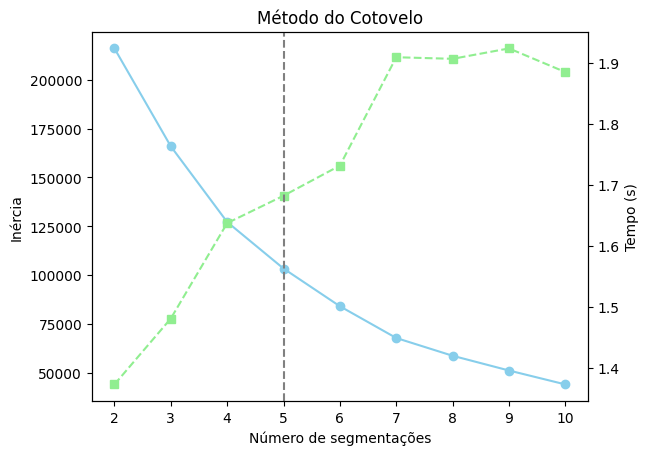

In [111]:
plot_elbow_method(inertias, fit_time)

In [112]:
n, distances = get_optimal_number_of_clusters(inertias)

In [113]:
n

5

In [114]:
distances

[1.1003237876474503e-15,
 1.3314941640969948,
 2.1331474280491127,
 2.241180174192701,
 2.138950629149794,
 1.895029676337687,
 1.3178460501262863,
 0.6687873746059736,
 1.1003237876474503e-15]

In [115]:
kmeans = KMeans(
        n_clusters=n, 
        algorithm='lloyd',
        copy_x=True,
        init='k-means++',
        max_iter=300,
        n_init='warn',
        random_state=42,
        tol=0.0001,
        verbose=0
    )
clusters = kmeans.fit_predict(df_rfm_amostra_maior_std[all_columns])

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [116]:
kmeans.feature_names_in_ 

array(['recency', 'frequency', 'monetary'], dtype=object)

In [117]:
kmeans.inertia_

103388.80345290819

In [118]:
df_rfm_amostra_maior["cluster"] = clusters
df_rfm_amostra_maior_std["cluster"] = clusters

In [119]:
df_rfm_amostra_maior_plot = df_rfm_amostra_maior.copy()
df_rfm_amostra_maior_plot["recency"] = df_rfm_amostra_maior_plot["recency"].apply(lambda x: 0 if x == 1 else 1/x)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/

CPU times: user 32 s, sys: 2.03 s, total: 34 s
Wall time: 30.9 s


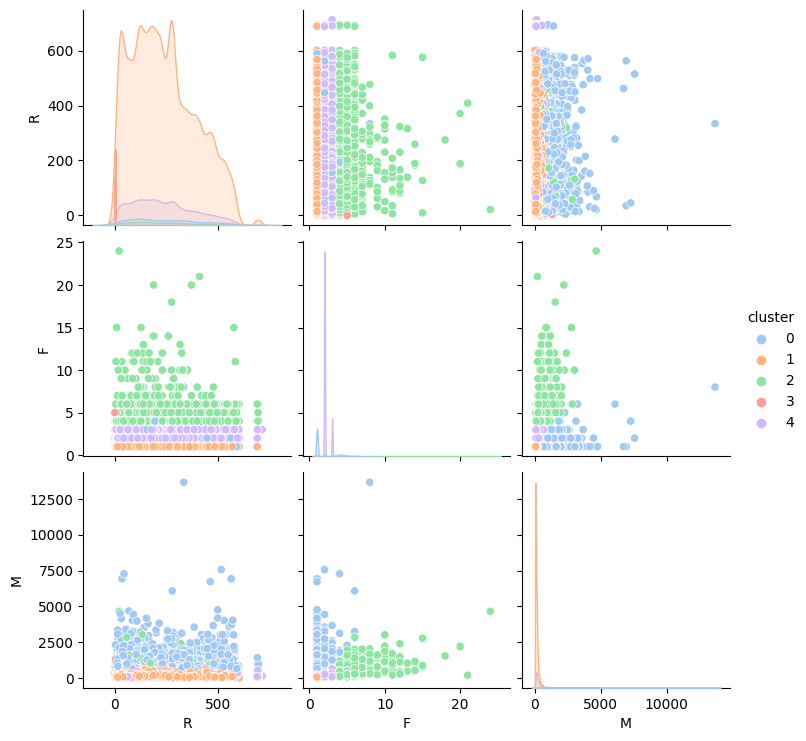

In [120]:
%%time
sns.pairplot(df_rfm_amostra_maior_plot[list(all_columns) + ["cluster"]].rename({"recency": "R", "frequency": "F", "monetary": "M"}, axis=1), hue="cluster", palette="pastel")

In [121]:
df_rfm_amostra_maior_plot = df_rfm_amostra_maior_plot.rename({"recency": "R", "frequency": "F", "monetary": "M"}, axis=1)

In [122]:
plot_segmentation(df_rfm_amostra_maior_plot, "R", "F", "M", border=False, marker_size=2)

In [123]:
df_rfm_amostra_maior[list(all_columns) + ["cluster"]].groupby("cluster").describe().T

cluster                     0             1            2            3  \
recency   count   2464.000000  79427.000000  1149.000000   189.000000   
          mean       0.009899      0.010734     0.011068     0.567901   
          std        0.017191      0.019911     0.020957     0.269519   
          min        0.001441      0.001439     0.001441     0.333333   
          25%        0.002786      0.002882     0.003058     0.333333   
          50%        0.004396      0.004566     0.004926     0.500000   
          75%        0.008929      0.008696     0.009259     1.000000   
          max        0.250000      0.250000     0.200000     1.000000   
frequency count   2464.000000  79427.000000  1149.000000   189.000000   
          mean       1.165179      1.000000     5.075718     1.195767   
          std        0.504858      0.000000     1.931856     0.617806   
          min        1.000000      1.000000     4.000000     1.000000   
          25%        1.000000      1.000000     4.000000     1.000000   
          50%        1.000000      1.000000     4.000000     1.000000   
          75%        1.000000      1.000000     6.000000     1.000000   
          max        8.000000      1.000000    24.000000     5.000000   
monetary  count   2464.000000  79427.000000  1149.000000   189.000000   
          mean    1129.630706    125.745193   462.844056   118.543810   
          std      667.340406     99.490673   395.605191   138.276181   
          min      630.090000      9.590000    53.160000    14.290000   
          25%      748.270000     57.890000   213.900000    43.410000   
          50%      913.700000     96.800000   344.110000    82.140000   
          75%     1288.805000    160.210000   578.750000   137.160000   
          max    13664.080000    630.280000  4655.880000  1312.670000   

cluster                     4  
recency   count  10129.000000  
          mean       0.010514  
          std        0.019738  
          min        0.001403  
          25%        0.002941  
          50%        0.004630  
          75%        0.008772  
          max        0.250000  
frequency count  10129.000000  
          mean       2.156284  
          std        0.363142  
          min        2.000000  
          25%        2.000000  
          50%        2.000000  
          75%        2.000000  
          max        3.000000  
monetary  count  10129.000000  
          mean     206.791159  
          std      132.982049  
          min       25.780000  
          25%      111.290000  
          50%      168.990000  
          75%      261.100000  
          max      856.860000

In [124]:
df_rfm_amostra_maior_plot[["R","F","M"] + ["cluster"]].groupby("cluster").describe().T

cluster             0             1            2            3             4
R count   2464.000000  79427.000000  1149.000000   189.000000  10129.000000
  mean     245.090503    238.169539   229.930374     1.857143    235.460361
  std      157.469051    152.548253   153.094993     1.196499    149.637012
  min        4.000000      4.000000     5.000000     0.000000      4.000000
  25%      112.000000    115.000000   108.000000     0.000000    114.000000
  50%      227.500000    219.000000   203.000000     2.000000    216.000000
  75%      359.000000    347.000000   327.000000     3.000000    340.000000
  max      694.000000    695.000000   694.000000     3.000000    713.000000
F count   2464.000000  79427.000000  1149.000000   189.000000  10129.000000
  mean       1.165179      1.000000     5.075718     1.195767      2.156284
  std        0.504858      0.000000     1.931856     0.617806      0.363142
  min        1.000000      1.000000     4.000000     1.000000      2.000000
  25%        1.000000      1.000000     4.000000     1.000000      2.000000
  50%        1.000000      1.000000     4.000000     1.000000      2.000000
  75%        1.000000      1.000000     6.000000     1.000000      2.000000
  max        8.000000      1.000000    24.000000     5.000000      3.000000
M count   2464.000000  79427.000000  1149.000000   189.000000  10129.000000
  mean    1129.630706    125.745193   462.844056   118.543810    206.791159
  std      667.340406     99.490673   395.605191   138.276181    132.982049
  min      630.090000      9.590000    53.160000    14.290000     25.780000
  25%      748.270000     57.890000   213.900000    43.410000    111.290000
  50%      913.700000     96.800000   344.110000    82.140000    168.990000
  75%     1288.805000    160.210000   578.750000   137.160000    261.100000
  max    13664.080000    630.280000  4655.880000  1312.670000    856.860000

In [125]:
df_rfm_to_score_maior = df_rfm_amostra_maior[['customer_unique_id', 'recency', 'frequency', 'monetary','cluster']]
impossible_to_score = get_score_from_qcut(df_rfm_to_score_maior)
get_score_to_impossible(df_rfm_to_score_maior, impossible_to_score)
get_ordered_columns(df_rfm_to_score_maior)
fill_na_scores(df_rfm_to_score_maior)
get_rfm_score(df_rfm_to_score_maior)
get_segment(df_rfm_to_score_maior)

In [126]:
qtd_por_cluster = pd.DataFrame(df_rfm_to_score_maior.groupby(["cluster","segment"])["RFM_SCORE"].count()).rename({"RFM_SCORE": "qtd"}, axis=1)

In [127]:
import plotly.express as px
#plot_customers_by_cluster(qtd_por_cluster, x="cluster", y="qtd", color="segment")

In [128]:
def get_formatted_values(df):
    df_formatted = df.copy()
    df_formatted.index = df_formatted["n"]
    del df_formatted["n"]
    
    for col in df_formatted.columns:
        df_formatted[col] = df_formatted[col].apply(lambda x: str(round(x,2)).replace(".", ","))
        
    return df_formatted

In [129]:
df_formatted = get_formatted_values(df_kmeans)
df_formatted

,silhouette_score,ch_score,db_score
n,,,
2,"0,78","7160,86","0,53"
3,"0,73","9766,85","0,95"
4,"0,69","11265,83","0,72"
5,"0,66","12275,45","0,61"
6,"0,67","12708,68","0,61"
7,"0,66","14029,36","0,61"
8,"0,66","14807,38","0,59"
9,"0,53","15924,45","0,61"
10,"0,53","16119,14","0,66"


In [130]:
df_formatted = get_formatted_values(df_agg_clustering)
df_formatted

,silhouette_score,ch_score,db_score
n,,,
2,"0,82","6860,37","0,27"
3,"0,66","8997,66","0,87"
4,"0,67","10496,65","0,69"
5,"0,62","10522,85","0,67"
6,"0,64","10931,69","0,7"
7,"0,65","11421,3","0,64"
8,"0,49","11997,38","0,66"
9,"0,49","13193,59","0,65"
10,"0,5","13601,86","0,64"


In [131]:
df_formatted = get_formatted_values(df_bikmeans)
df_formatted

,silhouette_score,ch_score,db_score
n,,,
2,"0,82","6862,15","0,29"
3,"0,53","4530,48","0,91"
4,"0,61","7429,91","0,96"
5,"0,62","8776,08","0,82"
6,"0,58","8710,1","0,99"
7,"0,59","8995,9","1,0"
8,"0,59","9461,74","0,97"
9,"0,59","8778,42","1,11"
10,"0,59","10030,01","1,01"
